# Introduction to MLOps

MLOps stands for Machine Learning Operations. It is like teamwork for building and running machine learning models. Imagine you're creating a robot that learns to play a game. You and your friends need to:

1. Teach the robot (train the model).
2. Check if it is learning correctly (test the model).
3. Make sure it keeps learning and improving over time (update the model).

MLOps helps automate and organize all these steps so the robot (or machine learning model) works well and keeps getting better. It's like having a plan and tools to make sure everything runs smoothly!
MLOps principles consist of monitoring and logging parameters, versioning data, and ensuring full traceability.
Since everything is tracked (data, parameters, code), the exact same model can be rebuilt, as all the “ingredients” are preserved.

    Continous Integration / Continous Delivery (CI/CD)
CI/CD stands for Continuous Integration and Continuous Deployment/Delivery. It's a process used in software development to automate and speed up the way code is built, tested, and delivered to users.

**Example**:
Imagine you're building a mobile app with your friends. Every time someone writes new code, it needs to be tested to make sure it works with the rest of the app. Instead of doing this manually:

    Continuous Integration (CI):

Every time someone adds code, it's automatically tested and merged into the main project. Think of it as a robot that checks if everyone's work fits together.

    Continuous Deployment (CD):

Once the code is tested and works, it's automatically sent to the app store or users. No waiting for someone to manually upload it.
This way, you can release updates faster and with fewer bugs! Tools like GitHub Actions, Jenkins, or Azure DevOps help automate this process.

         DESIGN
1. Problem definition & requirements 
2. Exploratory data analysis
3. Implementation design

        DEVELOPMENT
1. Feature engineering 
2. Experiment design
3. Model training & Evaluation

        DEPLOYMENT
1. Setup CI/CD pipeline
2. Deploy model
3. Monitoring

## MLflow : An open source platform for the machine learning lifecycle

    Introduction
MLflow is an open-source platform designed to manage the lifecycle of machine learning (ML) projects. Think of it as a tool that helps you keep track of your experiments, organize your models, and make it easier to deploy them into production.

    What does MLflow do?
MLflow has four main components:

- **Tracking**: It helps you log and compare your experiments. For example, you can record the parameters, metrics, and results of your ML models.
- **Projects**: It organizes your code into reusable and shareable formats.
- **Models**: It standardizes how you package and deploy ML models.
- **Registry**: It provides a central place to manage and version your models.


        Why is it helpful?
When you're building machine learning models, you often try different algorithms, tweak parameters, and test various datasets. Without a tool like MLflow, it can be hard to keep track of what you tried and what worked best. MLflow makes this process easier by automatically logging your work and allowing you to compare results.

        Example
Imagine you're building a model to predict house prices. You try two different algorithms: Linear Regression and Random Forest. For each algorithm, you test different hyperparameters (e.g., learning rate, number of trees). Here's how MLflow can help:

- Log experiments: You can log the algorithm, hyperparameters, and performance metrics (e.g., accuracy, RMSE) for each run.
- Compare results: MLflow provides a dashboard where you can see all your experiments and compare which combination of algorithm and parameters worked best.
- Save models: Once you find the best model, you can save it in a standardized format.
- Deploy easily: MLflow can help you deploy the model to a web service or integrate it into your application.

## MLflow Tracking

🏃 View run Synthetic Data Generation for Clustering Methods at: http://localhost:5000/#/experiments/0/runs/2916f84de80047b7b424c96161122e4b
🧪 View experiment at: http://localhost:5000/#/experiments/0
Data generation successful. Here are the first few rows:
-------------------------------------------------------


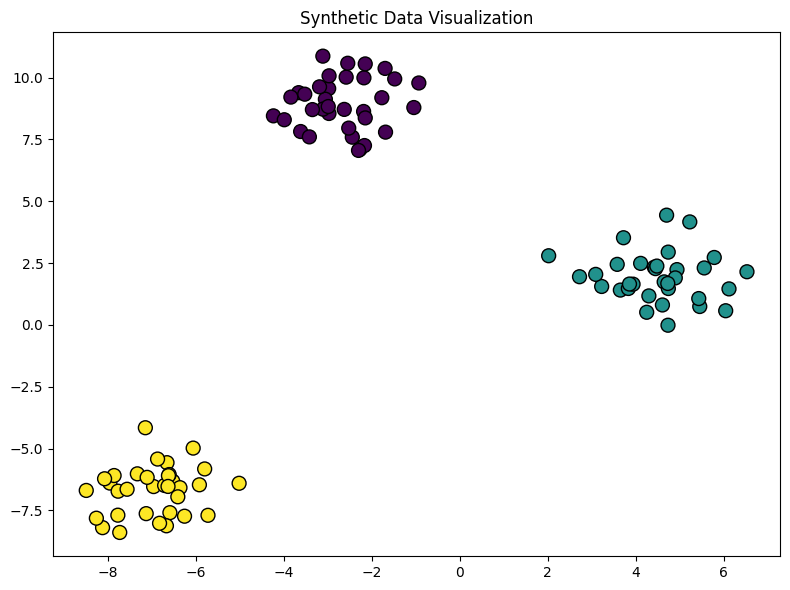

(    Feature_0  Feature_1  cluster
 0   -7.726421  -8.394957        2
 1    5.453396   0.742305        1
 2   -2.978672   9.556846        0
 3    6.042673   0.571319        1
 4   -6.521840  -6.319325        2
 ..        ...        ...      ...
 95  -3.186120   9.625962        0
 96  -1.478198   9.945566        0
 97   4.478593   2.377221        1
 98  -5.796576  -5.826308        2
 99  -3.348415   8.705074        0
 
 [100 rows x 3 columns],
 None)

In [2]:
## K-Nearest Neighbors Classifier Implementation with MLflow Tracking:

# Import necessary libraries:
import mlflow
mlflow.set_tracking_uri("http://localhost:5000")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import scikit-learn modules:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc,roc_auc_score
from sklearn.datasets import make_blobs, make_classification
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Set experiment name for MLflow:
experiment_name = "Clustering_Methods_Experiment_KMeans"
try:
    mlflow.create_experiment(experiment_name)
    mlflow.set_experiment_tag(key="Clustering", value="KMeans")
except Exception:
    experiment = mlflow.get_experiment_by_name(experiment_name)
    experiment_id = experiment.experiment_id


# Generate synthetic dataset (with type hints):
def generate_data(n_samples:int, n_features:int, centers:int, random_state:int) -> pd.DataFrame:
    with mlflow.start_run(run_name="Synthetic Data Generation for Clustering Methods"):
        mlflow.set_tag("model", "Data Generation")
        mlflow.log_param("n_samples", n_samples)
        mlflow.log_param("n_features", n_features)
        mlflow.log_param("centers", centers)
        mlflow.log_param("random_state", random_state)
        
    # Generate synthetic dataset using make_blobs
    X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=centers, random_state=random_state)
    # Convert to DataFrame
    df = pd.DataFrame(X, columns = [f'Feature_{i}' for i in range(n_features)])
    # Add cluster labels
    df['cluster'] = y 

    if df is not None :
        print("Data generation successful. Here are the first few rows:")
        print("-------------------------------------------------------")
        plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
        plt.scatter(df['Feature_0'], df['Feature_1'], c=df['cluster'], cmap='viridis', marker='o', edgecolor='k', s=100)
        plt.title('Synthetic Data Visualization')
        plt.grid(False)
        plt.tight_layout()

         # Save and log the plot as an artifact
        plt.savefig('synthetic_data_visualization.png')
        mlflow.log_artifact('synthetic_data_visualization.png')

    return df, plt.show()
# Call the function to generate data
generate_data(n_samples=100, n_features=2, centers=3, random_state=42)


## MLflow Tracking : Metrics, parameters and artifacts

In [8]:
# Launch the MLflow UI
!mlflow ui

Backend store URI not provided. Using sqlite:///mlflow.db
Registry store URI not provided. Using backend store URI.
2025/12/23 19:57:51 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2025/12/23 19:57:51 INFO mlflow.store.db.utils: Updating database tables
2025/12/23 19:57:51 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2025/12/23 19:57:51 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2025/12/23 19:57:51 INFO alembic.runtime.migration: Running upgrade  -> 451aebb31d03, add metric step
2025/12/23 19:57:51 INFO alembic.runtime.migration: Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
2025/12/23 19:57:51 INFO alembic.runtime.migration: Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
2025/12/23 19:57:51 INFO alembic.runtime.migration: Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
2025/12/23 19:57:51 INFO alembic.runtime.migration: Running upgrade df50e92f

In [11]:
import mlflow

try:
    mlflow.create_experiment("Datacamp - MLflow Tracking")
    mlflow.set_experiment("Datacamp - MLflow Tracking")
    mlflow.set_experiment_tag(key= "classification", value= "Logistic Regression")
    print(f"Experiment created and set successfully.")
except Exception as e:
    print(f"Experiment already exists or an error occurred: {e}")

Experiment already exists or an error occurred: RESOURCE_ALREADY_EXISTS: Experiment(name=Datacamp - MLflow Tracking) already exists. Error: (raised as a result of Query-invoked autoflush; consider using a session.no_autoflush block if this flush is occurring prematurely)
(sqlite3.IntegrityError) UNIQUE constraint failed: experiments.name
[SQL: INSERT INTO experiments (name, artifact_location, lifecycle_stage, creation_time, last_update_time) VALUES (?, ?, ?, ?, ?)]
[parameters: ('Datacamp - MLflow Tracking', '', 'active', 1766520386616, 1766520386616)]
(Background on this error at: https://sqlalche.me/e/20/gkpj)


/home/codespace/.python/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/home/codespace/.python/current/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


🏃 View run Logistic Regression Classifier at: http://localhost:5000/#/experiments/3/runs/6bc8d474916a447c9c2b93931ced64c4
🧪 View experiment at: http://localhost:5000/#/experiments/3


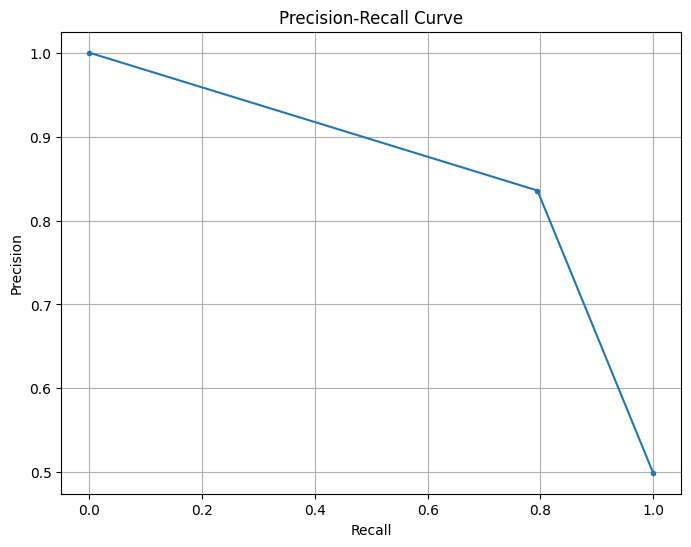

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve

with mlflow.start_run(run_name="Logistic Regression Classifier"):
    mlflow.set_experiment_tag("model", "Logistic Regression")
    # Generate synthetic classification dataset
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=42)
    # Convert to DataFrame for better visualization
    df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(X.shape[1])])
    # Add target variable
    df['Target'] = y

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Initialize Logistic Regression model and its parameters
    model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)

    # Log model parameters
    mlflow.log_params({
        "penalty": 'l2',
        "C": 1.0,
        "solver": 'liblinear',
        "random_state": 42
    })

    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    model.fit(X_test, y_test)
    y_pred = model.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    # Log evaluation artifacts
    with open("classification_report.txt", "w") as f:
        f.write(class_report)
    mlflow.log_artifact("classification_report.txt")

    with open("confusion_matrix.txt", "w") as f:
        f.write(np.array2string(conf_matrix))
    mlflow.log_artifact("confusion_matrix.txt")

    precision_recall_curve(y_test, y_pred)
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid()
    plt.savefig('precision_recall_curve.png')
    mlflow.log_artifact('precision_recall_curve.png')
    

